In [1]:
import numpy as np
from matplotlib import pyplot as plt
import openmc

In [7]:
neutron_data = openmc.data.IncidentNeutron.from_hdf5("Al27.h5")

Al27


{'_ignore_negative': False, '_x': array([-1.,  0.,  1.]), '_p': array([0.5, 0.5, 0.5]), '_interpolation': 'linear-linear', 'c': array([0. , 0.5, 1. ])}


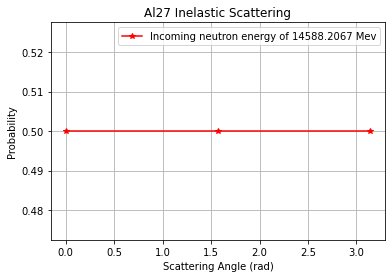

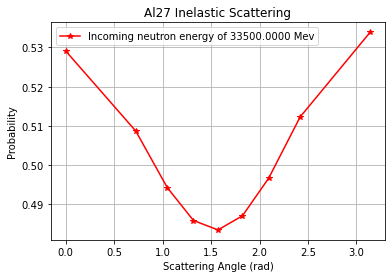

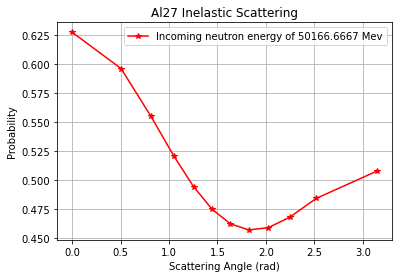

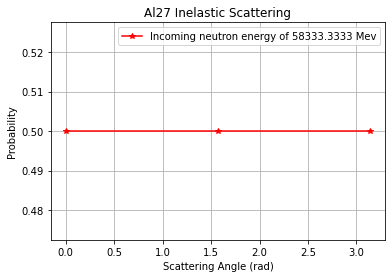

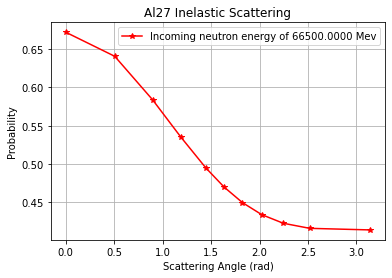

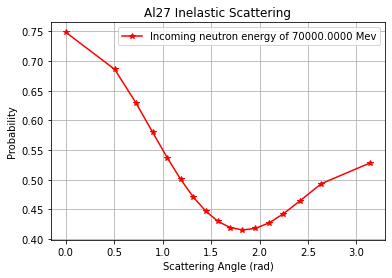

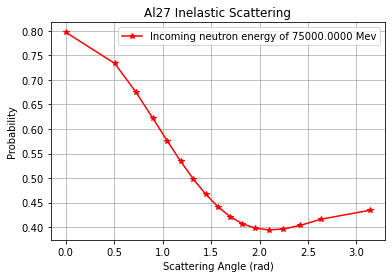

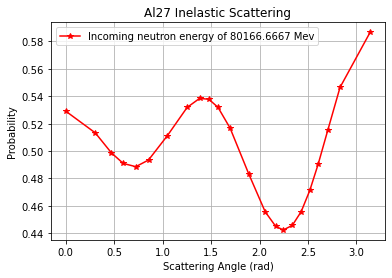

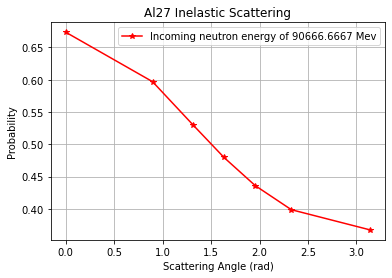

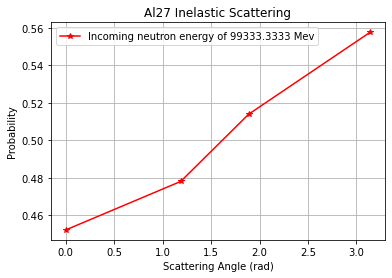

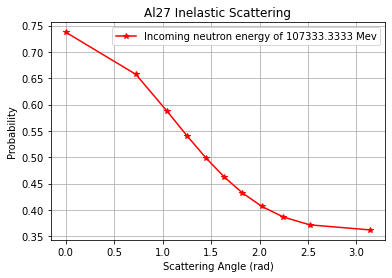

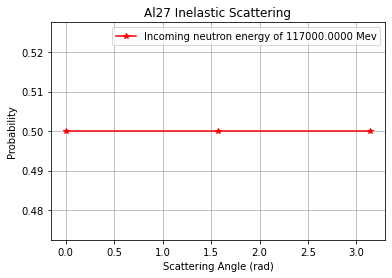

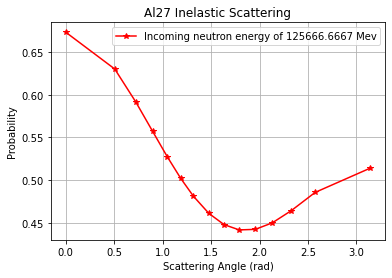

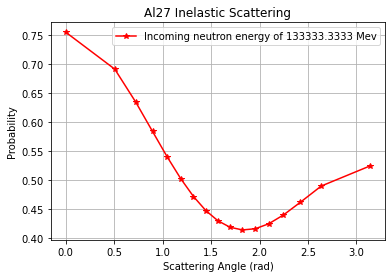

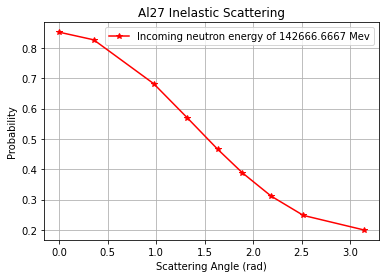

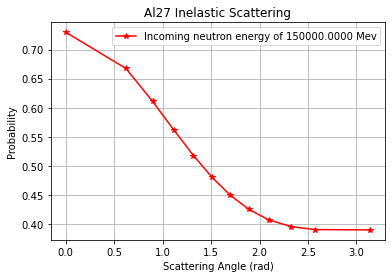

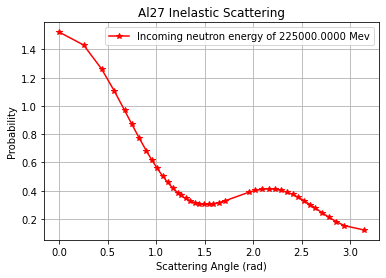

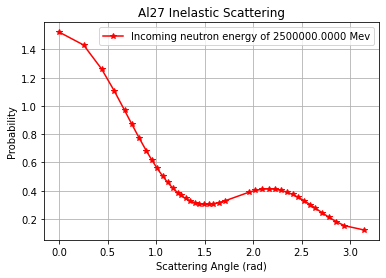

In [11]:
num_pts = 100
angle_cosines = np.linspace(1,-1,num_pts)
angles = np.linspace(0,np.pi,num_pts)
print(vars(mu_cosines[0]))
for i in range(len(incoming_energies)):
    plt.plot(np.arccos(mu_cosines[i].x),mu_cosines[i].p,"r-*",label=f"Incoming neutron energy of {format(incoming_energies[i]/(10*6),'.4f')} Mev")
    plt.legend()
    plt.grid()
    plt.title("Al27 Inelastic Scattering")
    plt.xlabel("Scattering Angle (rad)")
    plt.ylabel("Probability")
    plt.show()

19952623.149688788


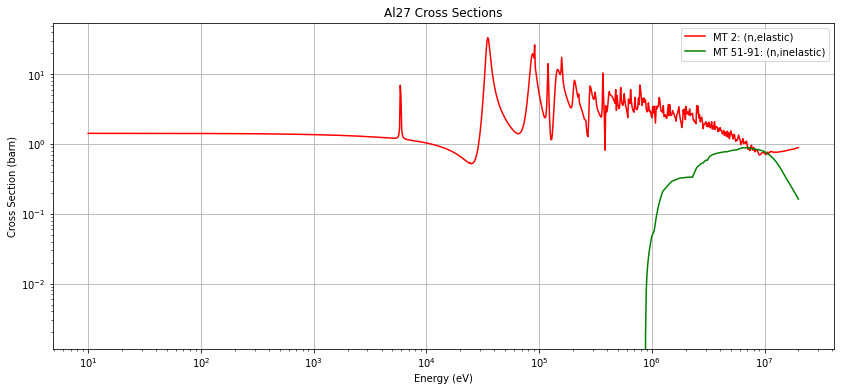

In [12]:
neutron_data = openmc.data.IncidentNeutron.from_hdf5("/home/andrew/Documents2/endfb71_hdf5/Al27.h5")
#x_pts = np.logspace(-5,7.3,10**3)
x_pts = np.logspace(1,7.3,10**3)
print(x_pts[-1])
#print(neutron_data.reactions[2].xs["294K"](x_pts))
el_scat_Al27 = neutron_data.reactions[2].xs["294K"]
scat_list = []
for i in range(51,90):
    scat_list.append(neutron_data.reactions[i].xs["294K"])
    
inel_scat_y = np.zeros(len(x_pts))

for i in range(len(scat_list)):
    inel_scat_y += scat_list[i](x_pts)
inel_scat_y += neutron_data.reactions[91].xs["294K"](x_pts)

fig = plt.figure(figsize=(14,6))
plt.title(neutron_data.name + " Cross Sections")
plt.plot(x_pts,el_scat_Al27(x_pts),"r-",label="MT 2: (n,elastic)")
plt.plot(x_pts,inel_scat_y,"g-",label="MT 51-91: (n,inelastic)")
#plt.plot(x_pts,neutron_data.reactions[102].xs["294K"](x_pts),"g-",label="MT 102: (z,g)")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barn)")
plt.grid()
plt.legend()

#plt.ylim(0.1,100)
plt.savefig('Resonance.png',dpi=300)
plt.show()

5563


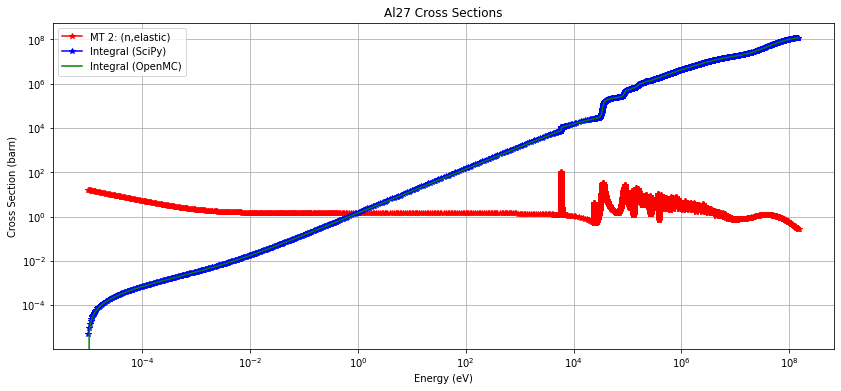

In [13]:
from scipy.integrate import cumulative_trapezoid
integral = neutron_data.reactions[2].xs["294K"].integral()
x = neutron_data.reactions[2].xs["294K"].x
y = neutron_data.reactions[2].xs["294K"].y
"""plt.plot(x,y)
plt"""
print(len(neutron_data.reactions[2].xs["294K"].integral()))
y_scipy = cumulative_trapezoid(y,x)
fig = plt.figure(figsize=(14,6))
plt.title(neutron_data.name + " Cross Sections")
plt.plot(x,y,"r*-",label="MT 2: (n,elastic)")
plt.plot(x[:-1],y_scipy,"b*-",label="Integral (SciPy)")
plt.plot(x,integral,"g-",label="Integral (OpenMC)")
#plt.plot(x_pts,neutron_data.reactions[102].xs["294K"](x_pts),"g-",label="MT 102: (z,g)")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barn)")
plt.grid()
plt.legend()
plt.savefig("IntegralComparison.png",dpi=300)
plt.show()

simpson integral 6845086.793577126
simpson avg 3.4225452150157087


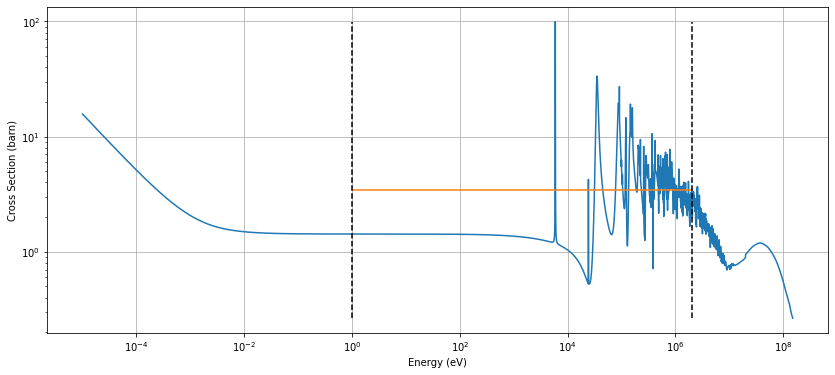

In [42]:
from scipy.integrate import simpson

energies = [2e6,1]

integral = neutron_data.reactions[2].xs["294K"].integral()
x = neutron_data.reactions[2].xs["294K"].x
y = neutron_data.reactions[2].xs["294K"].y


y_1 = y[x>energies[-1]]
x_1 = x[x>energies[-1]]

y_1 = y_1[x_1 <= energies[-2]]
x_1 = x_1[x_1 <= energies[-2]]


simpson_integral = simpson(y_1,x_1)
simpson_avg = simpson_integral / (x_1[-1]-x_1[0])

print("simpson integral",simpson_integral)
print("simpson avg",simpson_avg)
fig = plt.figure(figsize=(14,6))
plt.plot(x,y)
plt.plot([x_1[0],x_1[-1]],[simpson_avg,simpson_avg])
for count,engy in enumerate(energies):
    plt.plot([engy,engy],[min(y),max(y)],"k--")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barn)")
plt.grid()
plt.show()

In [51]:
x_pts = np.linspace(10**5,2.0*10**6,10**4)

avgs = []
for i in range(51,90):
    x = neutron_data.reactions[i].xs["294K"].x
    y = neutron_data.reactions[i].xs["294K"].y
    
    y_1 = y[x>energies[-1]]
    x_1 = x[x>energies[-1]]

    y_1 = y_1[x_1 <= energies[-2]]
    x_1 = x_1[x_1 <= energies[-2]]

    if len(y_1) > 0:
        simpson_integral = simpson(y_1,x_1)
        simpson_avg = simpson_integral / (x_1[-1]-x_1[0])

        avgs.append(simpson_avg)
    
x = neutron_data.reactions[91].xs["294K"].x
y = neutron_data.reactions[91].xs["294K"].y

y_1 = y[x>energies[-1]]
x_1 = x[x>energies[-1]]

y_1 = y_1[x_1 <= energies[-2]]
x_1 = x_1[x_1 <= energies[-2]]

if len(y_1) > 0:
    simpson_integral = simpson(y_1,x_1)
    simpson_avg = simpson_integral / (x_1[-1]-x_1[0])

    avgs.append(simpson_avg)

print(avgs)


[0.08450397894763195, 0.16809507515234556]


## $\Sigma_{1->2}$ Notes

A neutron can scatter either elastically or inelastically to lose energy. Elastic is more likely at lower energies and inelastic is more likely at higher energies. Because we are starting with neutrons of energies at ~2 MeV, they will need to scatter multiple times to 

## Elastic Scattering

$\alpha = \frac{(A-1)^2}{(A+1)^2}$  
Lethargy $\xi = 1 + \frac{\alpha}{1-\alpha}$  
Average number of scatters to go from $E_1$ to $E_2$ is $n=\frac{1}{\xi}ln(\frac{E_1}{E_2})$

## Inelastic Scattering

19952623.149688788


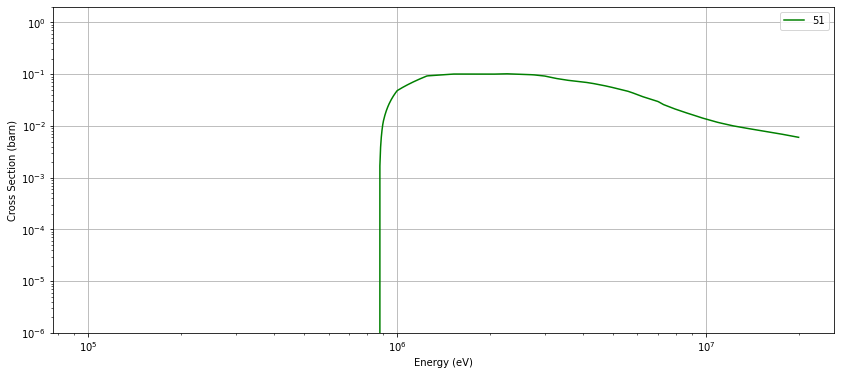

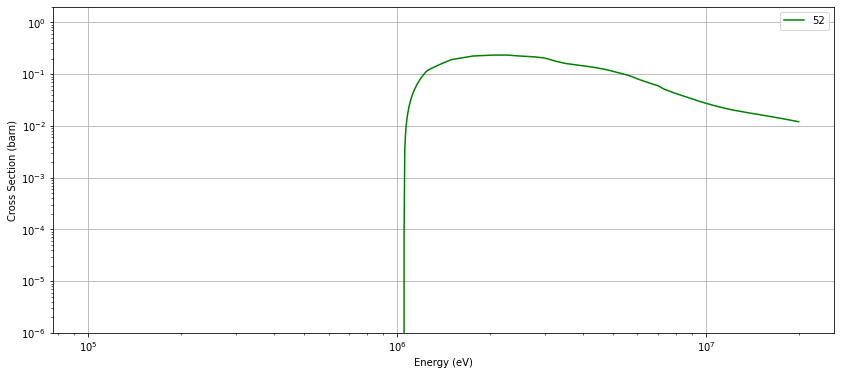

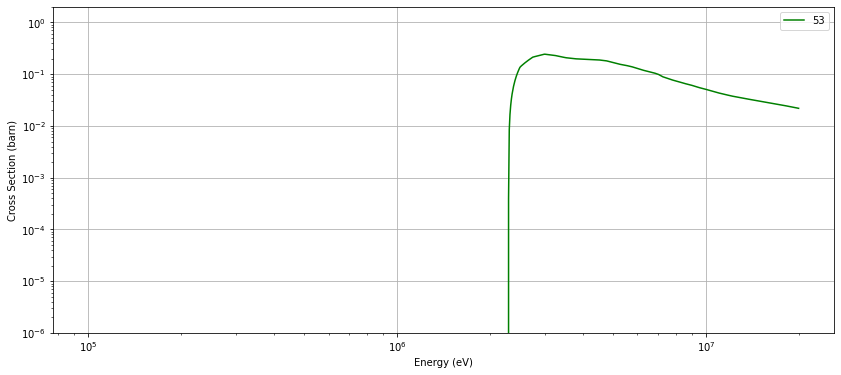

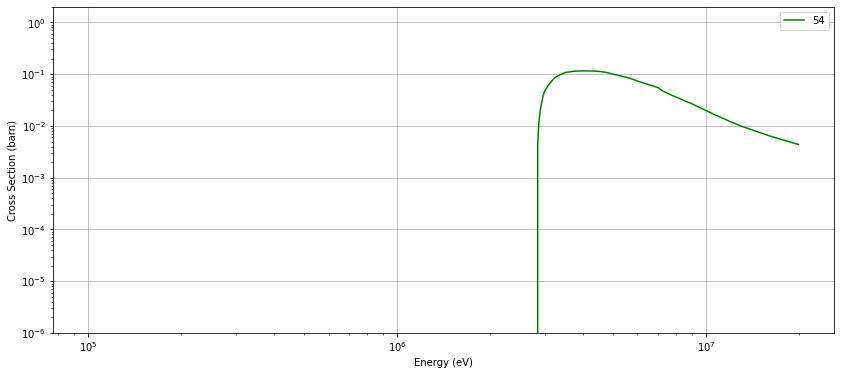

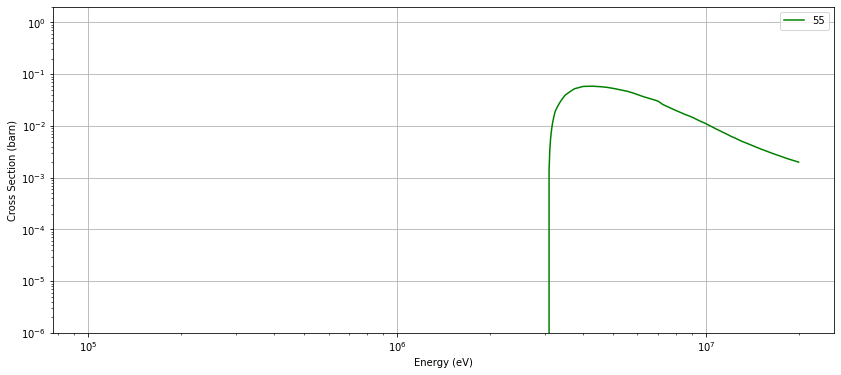

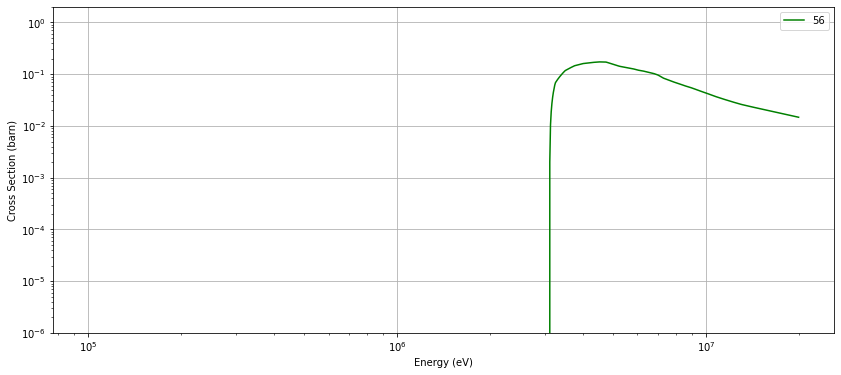

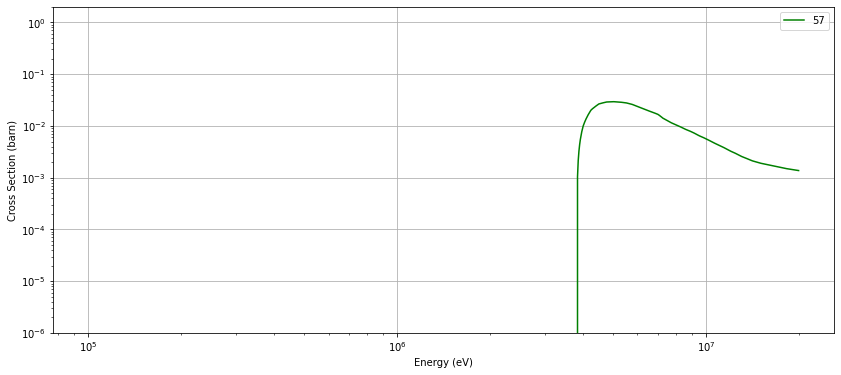

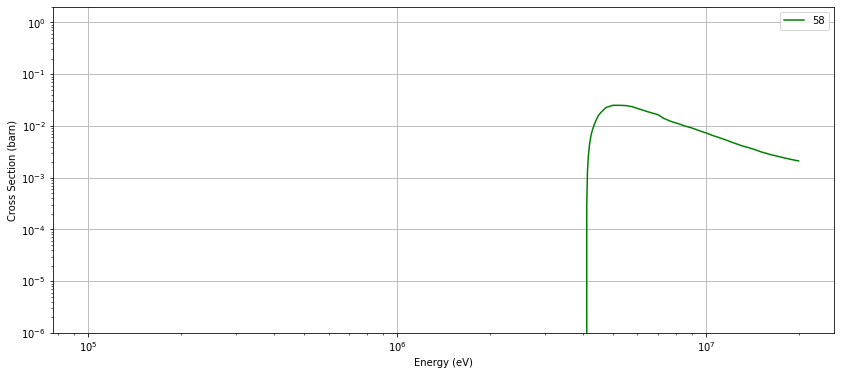

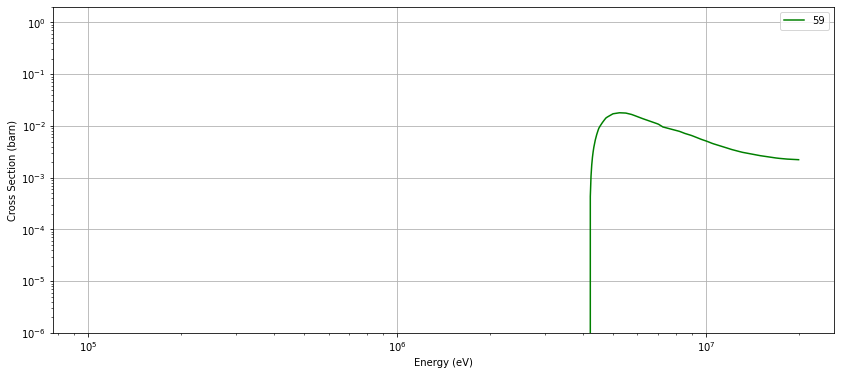

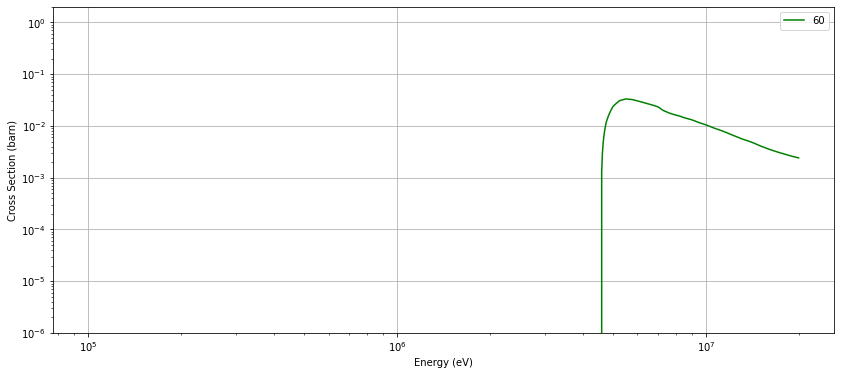

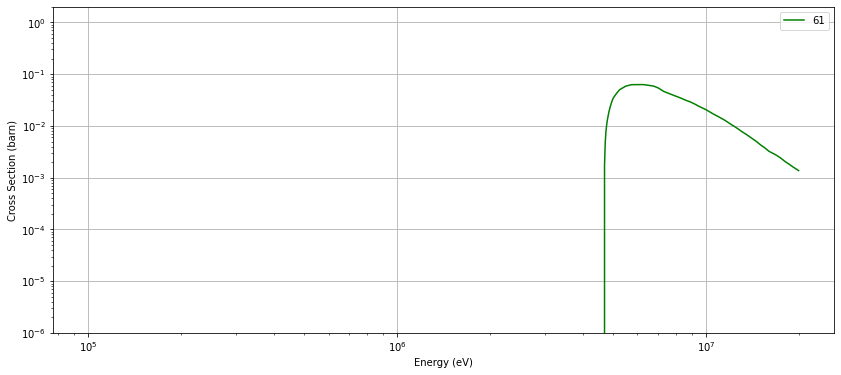

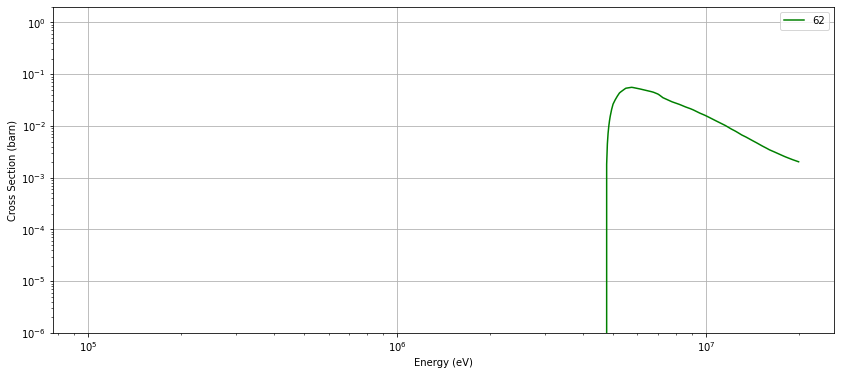

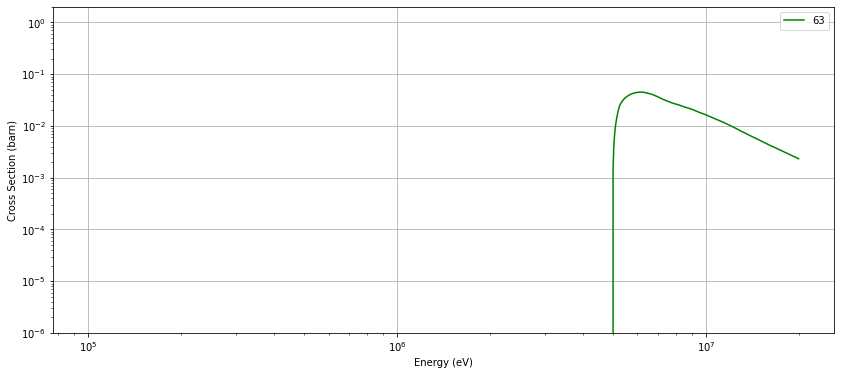

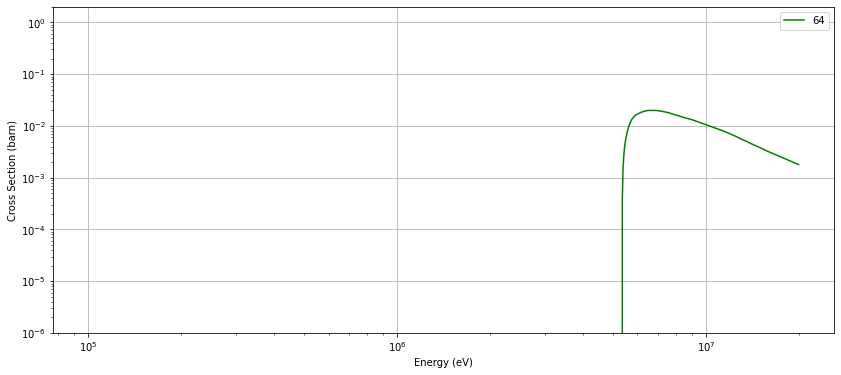

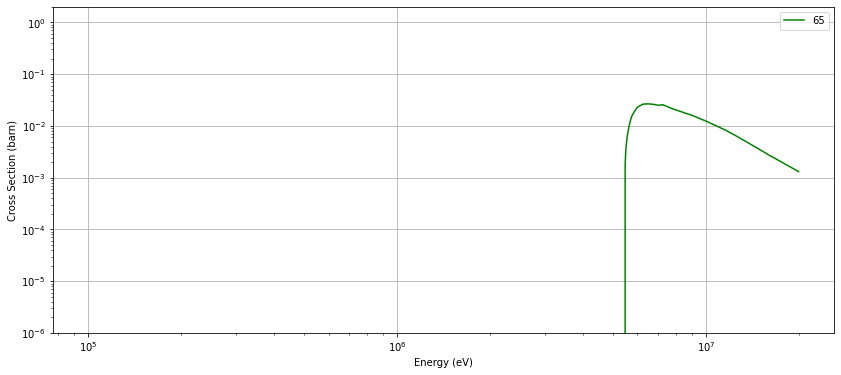

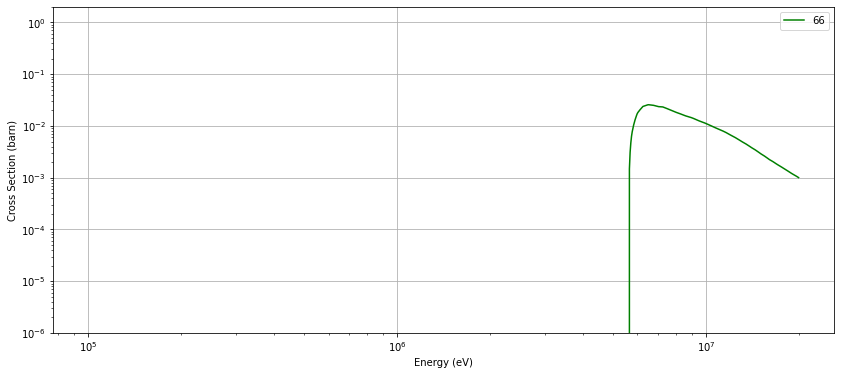

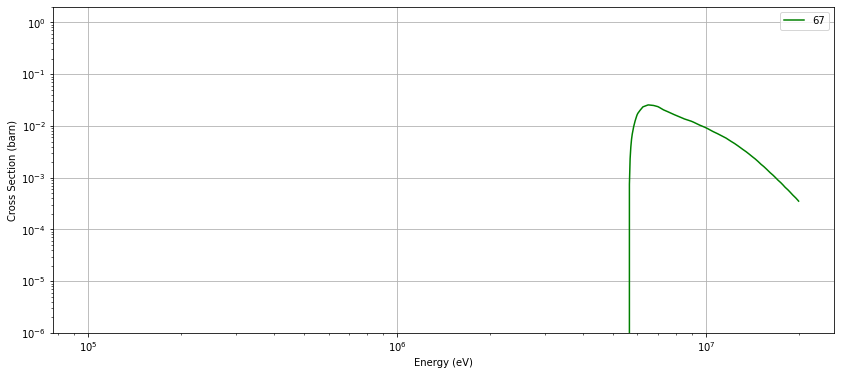

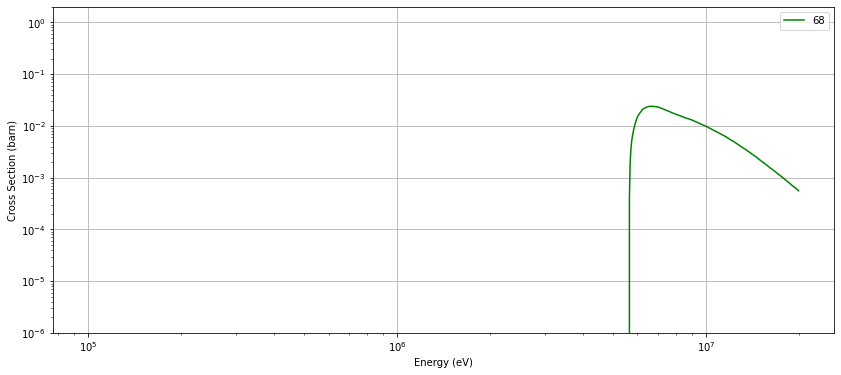

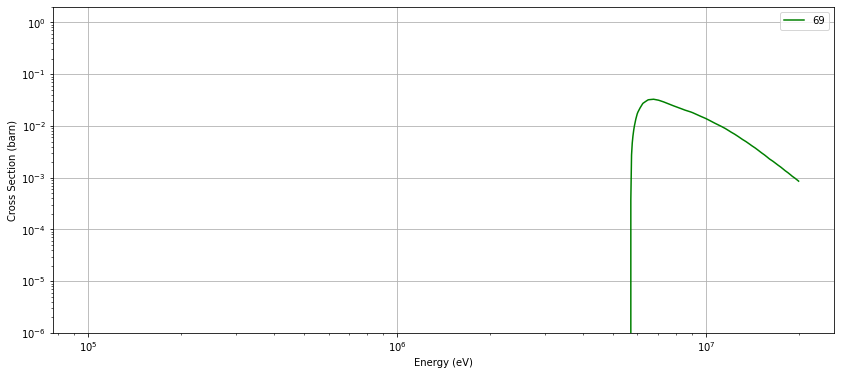

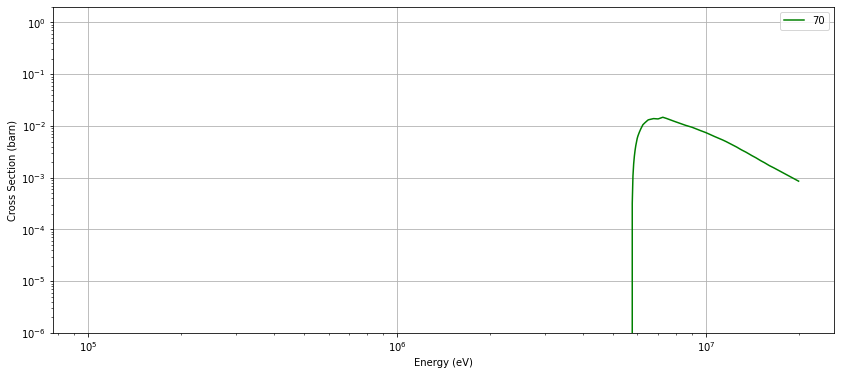

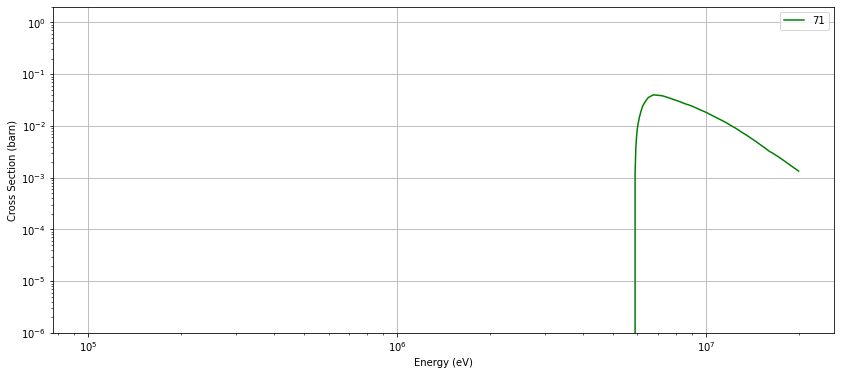

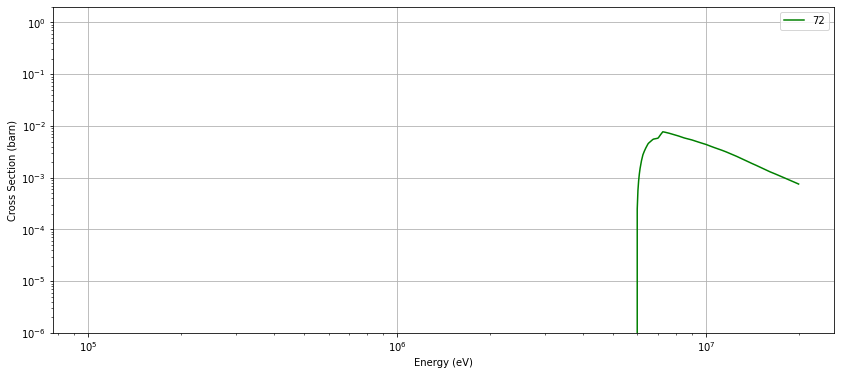

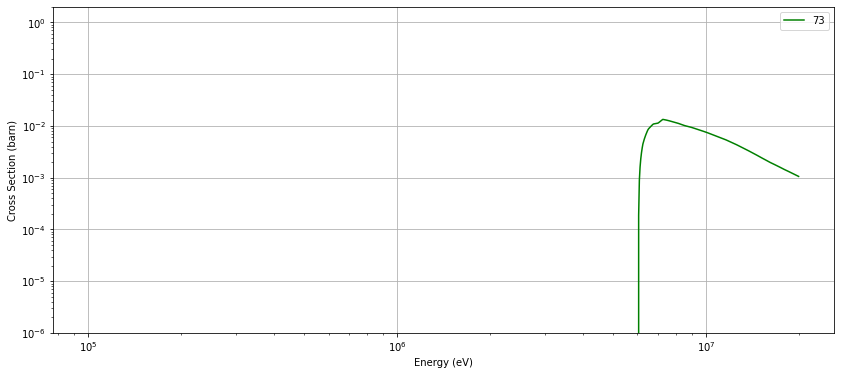

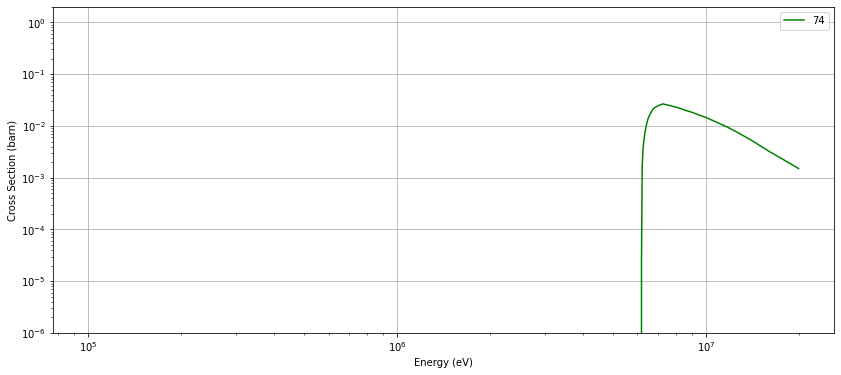

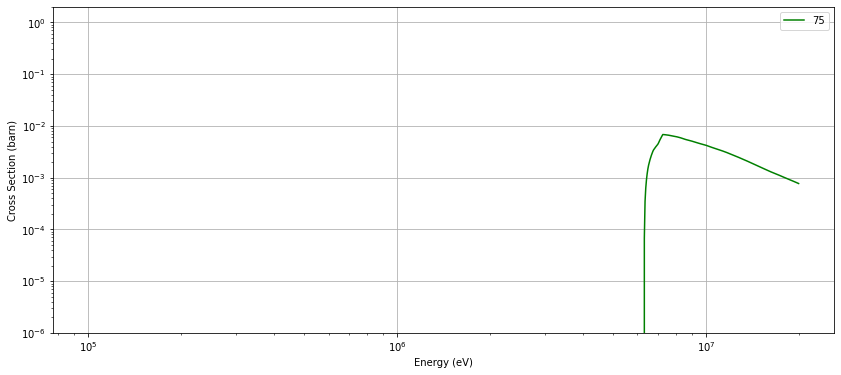

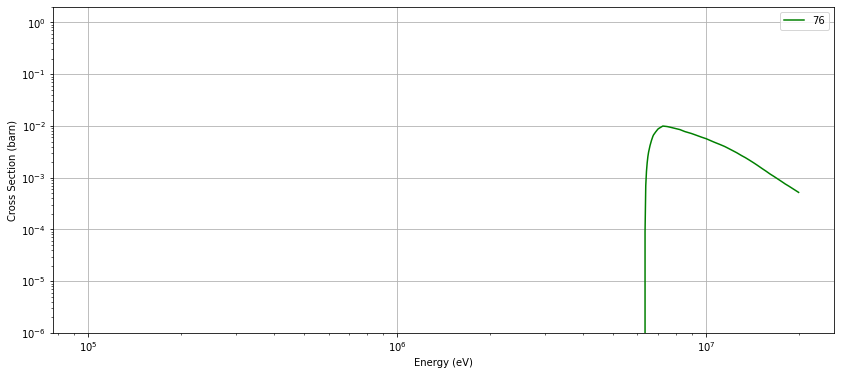

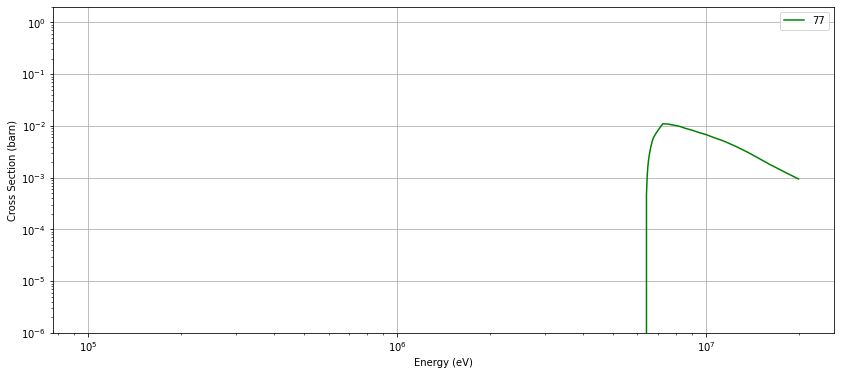

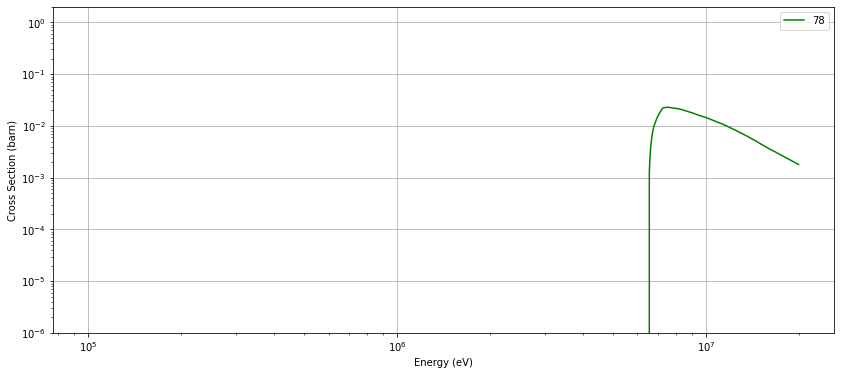

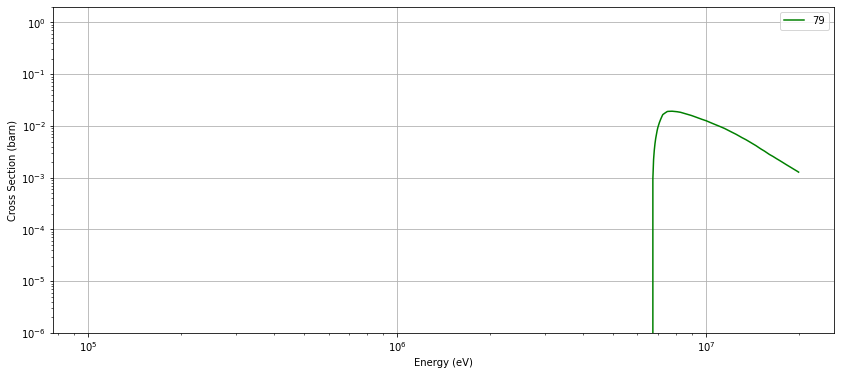

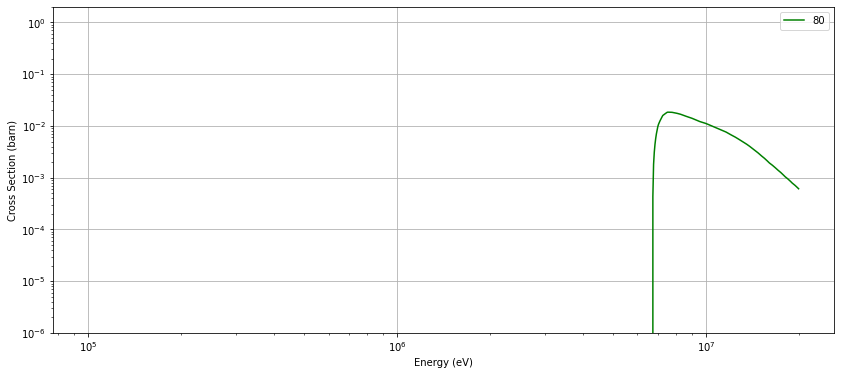

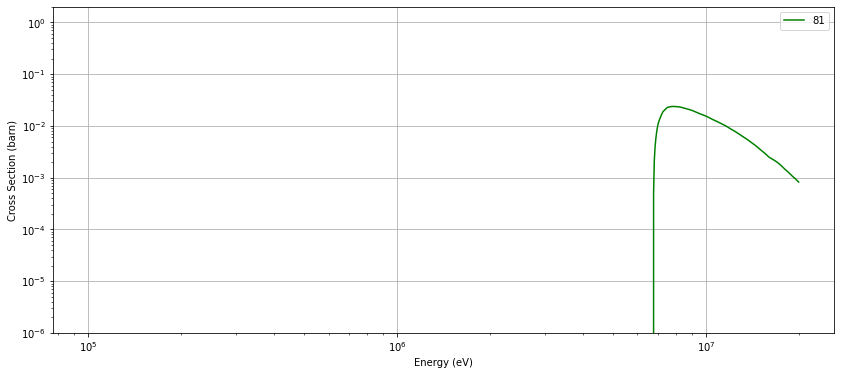

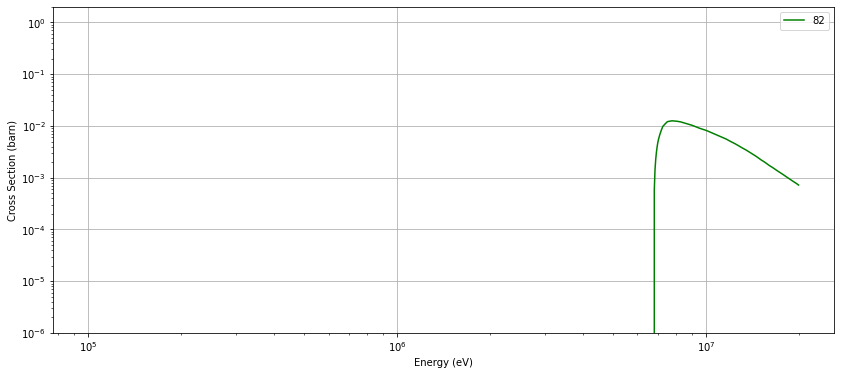

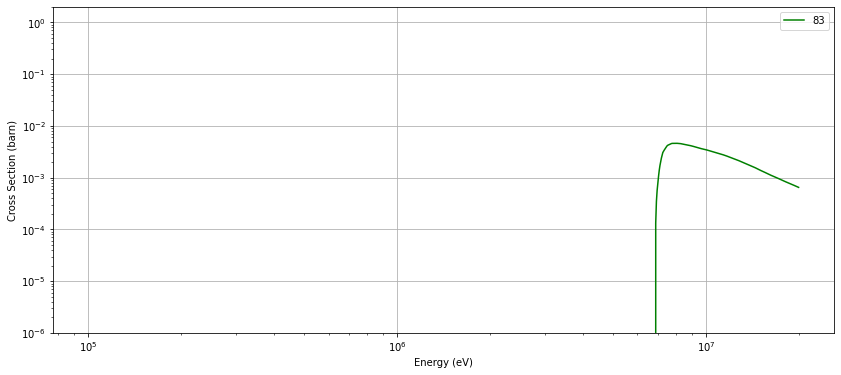

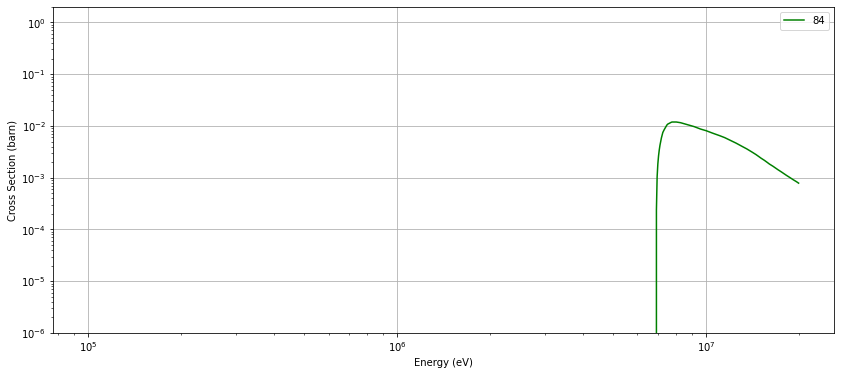

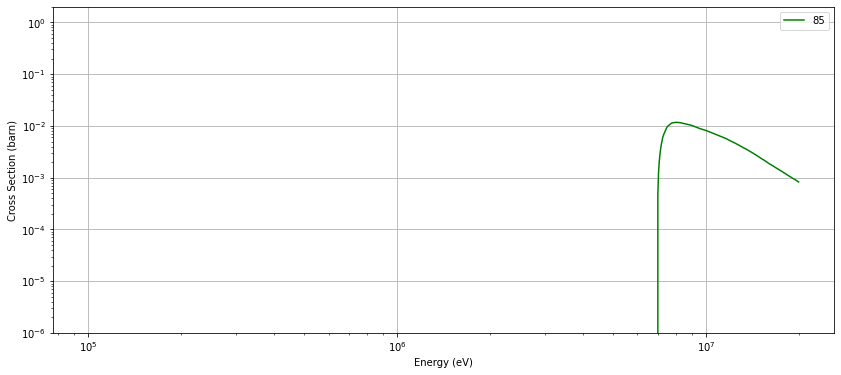

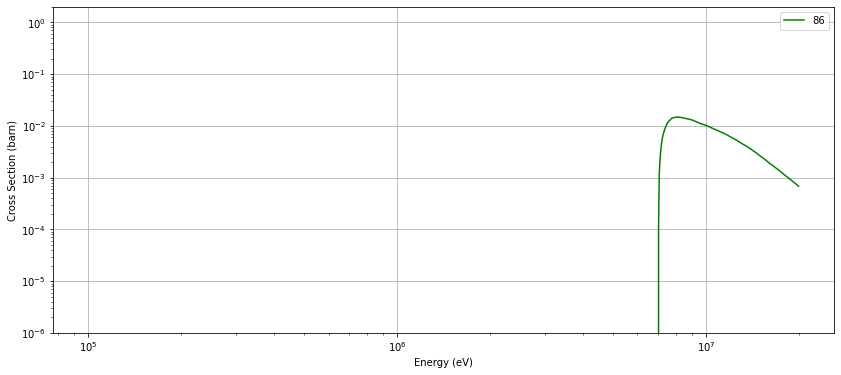

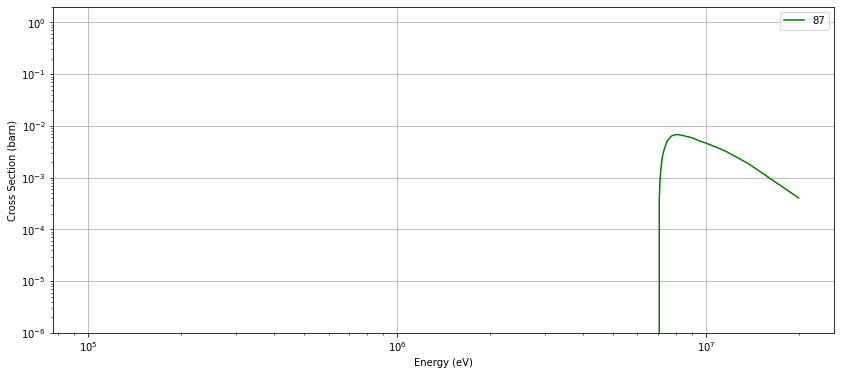

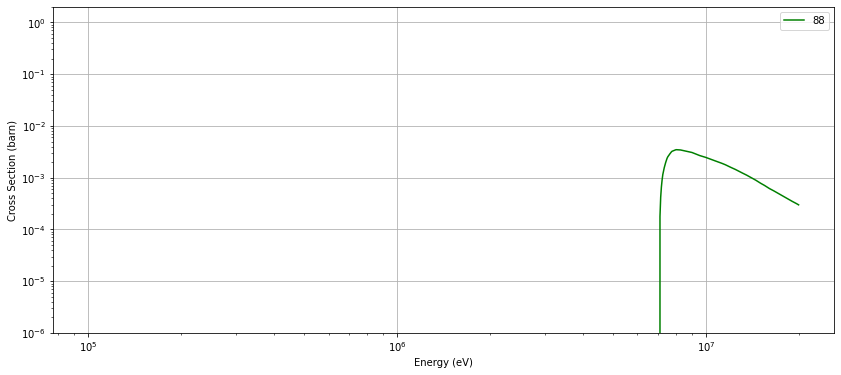

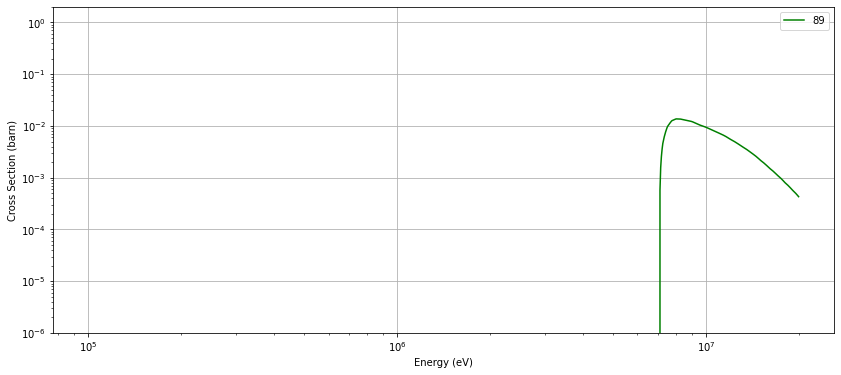

'inel_scat_y += neutron_data.reactions[91].xs["294K"](x_pts)\n\nfig = plt.figure(figsize=(14,6))\nplt.title(neutron_data.name + " Cross Sections")\nplt.plot(x_pts,el_scat_Al27(x_pts),"r-",label="MT 2: (n,elastic)")\nplt.plot(x_pts,inel_scat_y,"g-",label="MT 51-91: (n,inelastic)")\n#plt.plot(x_pts,neutron_data.reactions[102].xs["294K"](x_pts),"g-",label="MT 102: (z,g)")\nplt.yscale("log")\nplt.xscale("log")\nplt.xlabel("Energy (eV)")\nplt.ylabel("Cross Section (barn)")\nplt.grid()\nplt.legend()\n\n#plt.ylim(0.1,100)\nplt.savefig(\'Resonance.png\',dpi=300)\nplt.show()'

In [14]:
x_pts = np.logspace(5,7.3,10**3)
print(x_pts[-1])
#print(neutron_data.reactions[2].xs["294K"](x_pts))
el_scat_Al27 = neutron_data.reactions[2].xs["294K"]
scat_list = []
for i in range(51,90):
    scat_list.append(neutron_data.reactions[i].xs["294K"])
    
inel_scat_y = np.zeros(len(x_pts))

for i in range(51,90):
    fig = plt.figure(figsize=(14,6))
    plt.plot(x_pts,neutron_data.reactions[i].xs["294K"](x_pts),"g-",label=i)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Energy (eV)")
    plt.ylabel("Cross Section (barn)")
    plt.ylim(10**-6,2)
    plt.grid()
    plt.legend()
    plt.show()
"""inel_scat_y += neutron_data.reactions[91].xs["294K"](x_pts)

fig = plt.figure(figsize=(14,6))
plt.title(neutron_data.name + " Cross Sections")
plt.plot(x_pts,el_scat_Al27(x_pts),"r-",label="MT 2: (n,elastic)")
plt.plot(x_pts,inel_scat_y,"g-",label="MT 51-91: (n,inelastic)")
#plt.plot(x_pts,neutron_data.reactions[102].xs["294K"](x_pts),"g-",label="MT 102: (z,g)")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Energy (eV)")
plt.ylabel("Cross Section (barn)")
plt.grid()
plt.legend()

#plt.ylim(0.1,100)
plt.savefig('Resonance.png',dpi=300)
plt.show()"""

In [15]:
a = np.array([1,2,3,4])
b = np.array([3,12,1,0])
c = a + b
print(c)

[ 4 14  4  4]


In [16]:
energies = [2.7,2.54,2.46,2.29,2.18]

for en in energies:
    print(en,el_scat_Al27(en * 10**6))

2.7 2.260265
2.54 2.720095
2.46 1.7608243333333333
2.29 2.734574718527522
2.18 2.9700830000000003
